# Lecture 18: Loss functions and regression

Many problems in optimization and statistical inference can be fomulated as the minimization of a [loss function](https://en.wikipedia.org/wiki/Loss_function). One example of this that we will explore today is [linear regression](https://en.wikipedia.org/wiki/Linear_regression). 

In the linear regression problem, we assume that there is a linear relationship between a measured *response variable* $y$ and one (or more) *independent variable(s)* $x$. If this relationship was exact, then we would only need a single measurement to determine the coefficient relating $x$ and $y$. However, there may be some experimental error or noise associated with measuring these variables, or the relationship between $x$ and $y$ may be probabilistic instead of deterministic. In such cases, we need to make multiple measurements and analyze them carefully to determine the relationship.

Let's imagine that we test a whole range of values for the independent variable $X = \{x_1, x_2, \ldots, x_N\}$, and for each one we measure the value of the response variable $Y = \{y_1, y_2, \ldots, y_N\}$. One simple way to determine the linear relationship between the $x$ and $y$ variables is to search for a parameter $\alpha$ that minimizes the squared difference between the predicted and measured values of $y$,

$$
L(\alpha) = \sum_{i=1}^{N}\left(y_i - \alpha x_i\right)^2\,.
$$

Here, $L(\alpha)$ is our loss function. This "version" of linear regression is called [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares), or OLS. Sometimes for convenience we can express the above equation in vector form,

$$
L(\alpha) = \left(Y - \alpha X\right)^2\,.
$$

In this simple case, we can analytically find the value of $\alpha$ that minimizes the loss function. This is

$$
\hat{\alpha} = \left(X^T X\right)^{-1}X^T Y\,.
$$

Here the hat $\hat{\cdot}$ over the $\alpha$ variable denotes our *estimate* of the "true" value of $\alpha$, based on our data. 


### Example: Estimating a noisy linear relationship

Let's assume that we are trying to measure the spring constant of a spring by stretching it to different distances and measuring the force of resistance. We'll assume that the measurements aren't completely precise, due to the bouncing of the spring and other factors. Mathematically we can write this as

$$
F = -k x + \epsilon\,,
$$

where $\epsilon$ is a random noise term. We can assume that $\epsilon$ follows a Gaussian distribution,

$$
P(\epsilon) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{\epsilon^2}{2\sigma^2}}\,.
$$

Let's begin by first generating a simulated data set using these assumptions. We'll assume that $k = 1$ and $\sigma = 0.4$.

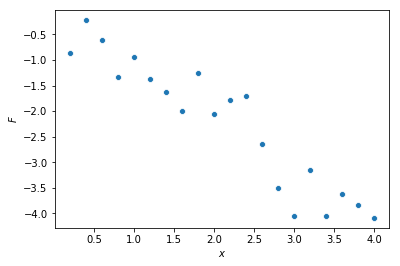

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import seaborn as sns
import matplotlib.pyplot as plt


# Define spring parameters and choose a range of x values to test

k     = 1.0
sigma = 0.4

X = np.arange(0.2, 4.2, 0.2)
Y = -k*X + rng.normal(loc=0, scale=sigma, size=len(X))


# Plot the measurements

sns.scatterplot(X, Y)
plt.xlabel('$x$')
plt.ylabel('$F$');

### Estimating the relationship

Now we can apply our formula to estimate the relationship between the force and the stretch, the spring constant $k$.

In [2]:
# Estimate the spring constant with OLS

k_hat = -np.sum(X*Y)/np.sum(X*X)

print('The estimated spring constant is {}, true value is {}'.format(k_hat, k))

The estimated spring constant is 1.0514420934396802, true value is 1.0


We can also use some standard Python packages to do this. Let's try this using the `statsmodels` package.

In [3]:
import statsmodels.api as sm

model   = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     657.3
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           3.34e-16
Time:                        01:49:56   Log-Likelihood:                -11.420
No. Observations:                  20   AIC:                             24.84
Df Residuals:                      19   BIC:                             25.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0514      0.041    -25.638      0.0

The output is much more verbose (giving lots of statistical information), but we find the same result.

### The effects of finite sampling

Now, let's explore what happens when we change the number of measurements or the strength of the noise. 

**Exercise:** Copy your code from the first code block above and experiment with different numbers of data points (i.e., the size of the `X` vector) and different levels of noise (measured by the standard deviation `sigma`). How does the robustness of the results change as you increase the noise or decrease the number of samples?

The estimated spring constant is 1.309330000499036, true value is 1.0


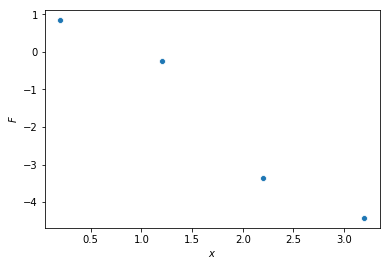

In [10]:
# Define spring parameters and choose a range of x values to test

k     = 1.0
sigma = 1.0

X = np.arange(0.2, 4.2, 1.0)
Y = -k*X + rng.normal(loc=0, scale=sigma, size=len(X))


# Plot the measurements

sns.scatterplot(X, Y)
plt.xlabel('$x$')
plt.ylabel('$F$');


# Estimate the spring constant with OLS

k_hat = -np.sum(X*Y)/np.sum(X*X)

print('The estimated spring constant is {}, true value is {}'.format(k_hat, k))

### Regularization

We noticed that, when the noise is strong and when the number of samples is very small, it becomes more difficult to estimate the relationship between $x$ and $y$. In the extreme, when we have just a few samples, some estimates can even be of the wrong sign.

One way to control our estimates is to use [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)). Here, we'll implement a simple strategy sometimes referred to as [Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization) or $L_2$-norm regularization. Returning to our loss function, we can also penalize large values of the inferred linear coefficient:

$$
L(\alpha) = \left(Y - \alpha X\right)^2 + \gamma\alpha^2\,.
$$

Again, in this case we can analytically find the estimate of $\alpha$ that minimizes the loss function,

$$
\hat{\alpha} = \left(X^T X + \gamma I\right)^{-1}X^T Y\,.
$$

Let's test this version of regression below.

The estimated spring constant is 1.583040443288027
The estimated spring constant is 1.4721832693883052 (regularized)


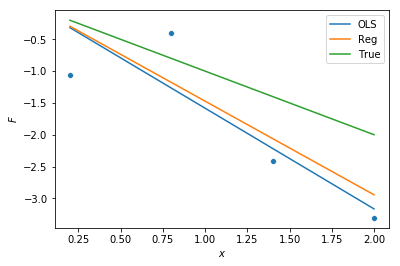

In [12]:
# Define spring parameters and choose a range of x values to test

gamma = 0.5
k     = 1.0
sigma = 1.0

X = np.arange(0.2, 2.2, 0.6)
Y = -k*X + rng.normal(loc=0, scale=sigma, size=len(X))


# Get the estimated spring constant with and without regularization

k_hat     = -np.sum(X*Y)/np.sum(X*X)
k_hat_reg = -np.sum(X*Y)/(np.sum(X*X) + gamma)

print('The estimated spring constant is {}'.format(k_hat))
print('The estimated spring constant is {} (regularized)'.format(k_hat_reg))


# Plot the measurements

sns.scatterplot(X, Y)
sns.lineplot(X, -k_hat*X, label='OLS')
sns.lineplot(X, -k_hat_reg*X, label='Reg')
sns.lineplot(X, -k*X, label='True')
plt.xlabel('$x$')
plt.ylabel('$F$');

### Checking the variance of the estimate

One advantage of regularization is that it reduced the variance of the parameters that we estimate. Let's run many measurement simulations below and record the estimates of $k$ that we get in each case, then compare them with and without regularization.

Estimate of k mean: 1.00, std: 0.48
Estimate of k mean: 0.90, std: 0.43	(regularized)


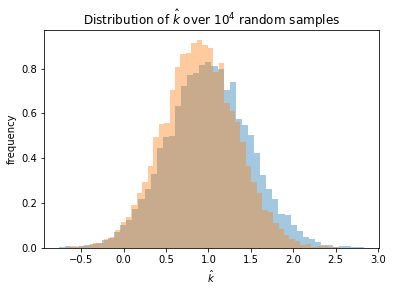

In [13]:
# Define spring parameters and choose a range of x values to test

gamma = 0.5
k     = 1.0
sigma = 1.0

k_hats     = []
k_hat_regs = []

for i in range(10000):
    X = np.arange(0.2, 2.2, 0.8)
    Y = -k*X + rng.normal(loc=0, scale=sigma, size=len(X))

    k_hats.append(-np.sum(X*Y)/np.sum(X*X))
    k_hat_regs.append(-np.sum(X*Y)/(np.sum(X*X) + gamma))

print('Estimate of k mean: %.2f, std: %.2f' % (np.mean(k_hats), np.std(k_hats)))
print('Estimate of k mean: %.2f, std: %.2f\t(regularized)' % (np.mean(k_hat_regs), np.std(k_hat_regs)))

# Plot a histogram of the results

sns.distplot(k_hats, norm_hist=True, kde=False, label='OLS')
sns.distplot(k_hat_regs, norm_hist=True, kde=False, label='Reg')
plt.title(r'Distribution of $\hat{k}$ over $10^4$ random samples')
plt.xlabel(r'$\hat{k}$')
plt.ylabel('frequency');

Our estimates show a [tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) between the bias of the estimate and its variance -- the regularized estimate tends to be smaller than the true value of $k$, but it has lower variance than the unregularized estimate. **Typically**, it is a good idea in inference to introduce some bias in order to reduce the variance, but such questions must always be approached case by case.